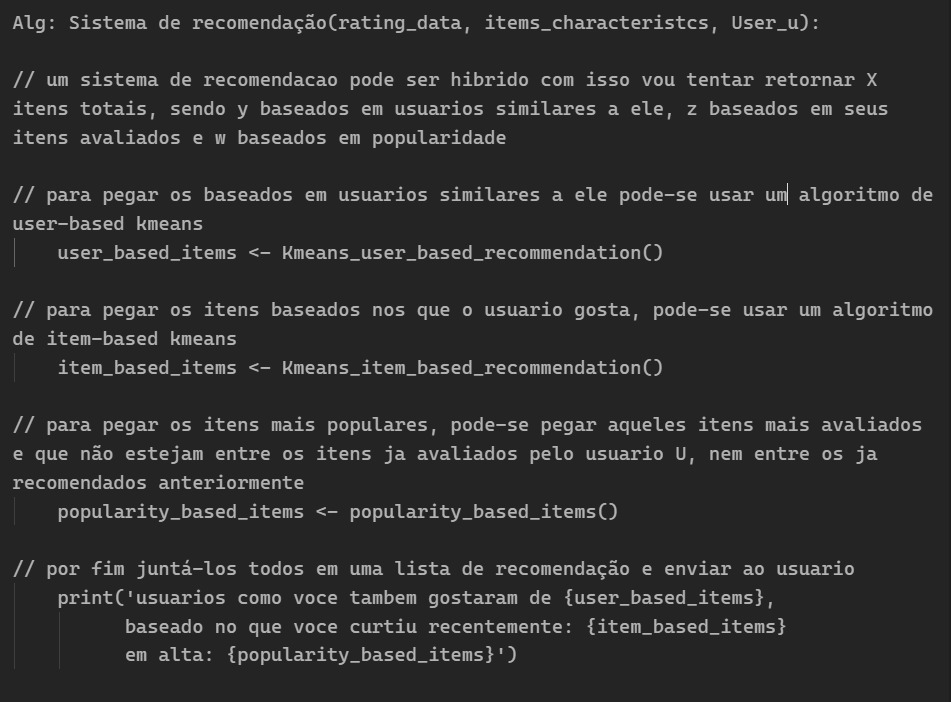

In [4]:
import pandas as pd
import numpy as np

import recommendation_functions as rf

def recommendation_system(user_index, rating_data, items_characteriscts, items, n_user = 6, n_items = 4, n_popularity = 4):
    print('Buscando as melhores recomendacoes para você: \n')
    # para o user based eh basicamente so aplciar a funcao 
    user_based_items = rf.return_user_based_recommendation(data= rating_data, user_id= user_index, number_of_recommendations= n_user)
    
    print('Usuarios como voces gostaram de :')    
    for item in user_based_items:
        print(item)

    #para o item based, vai ser preciso pegar os itens que o usuario ja avaliou e aqueles que ele mais gostou 
    liked_items, rated_items = rf.get_liked_items(rating_data= rating_data, user_index= user_index)
    
    #pegar os itens do item_based
    item_based_items =  rf.item_based_kmeans(item_characteristics= items_characteriscts, items_columns= items, rated_items= rated_items, liked_items= liked_items, number_recommendation= n_items)
    print('\nBaseado em suas ultimas avaliacoes: ')    
    for item in item_based_items:
        print(item)
    
    
    #por fim os itens por popularidade
    popularity_based = rf.popularity_based_recommendation(rating_data= rating_data, rated_items= rated_items, item_based_items= item_based_items, user_based_items = user_based_items, n = n_popularity)

    print('\nEm alta: ')    
    for item in popularity_based:
        print(item)

    recommended_items = user_based_items + item_based_items + popularity_based
    

    return recommended_items


In [5]:
import warnings
warnings.filterwarnings("ignore")

rating_data = pd.read_csv('..\cleaned_datasets\movies_pivot_1.csv').fillna(0)
items_characteristics = pd.read_csv('..\cleaned_datasets\movies_genres.csv').fillna(0)
#items_characteristics.drop(columns='Movie Name', inplace= True)
items = rating_data.columns.drop(labels= 'User Average Rating')

rec = recommendation_system(user_index= 23, rating_data= rating_data,items_characteriscts= items_characteristics, items = items )

Buscando as melhores recomendacoes para você: 

Usuarios como voces gostaram de :
Selena (1997)
Pillow Book, The (1995)
Shall We Dance? (1996)
Paths of Glory (1957)
Vanya on 42nd Street (1994)
Things to Do in Denver when You're Dead (1995)

Baseado em suas ultimas avaliacoes: 
Saint of Fort Washington, The (1993)
Great Day in Harlem, A (1994)
Maya Lin: A Strong Clear Vision (1994)
Schindler's List (1993)

Em alta: 
Star Wars (1977)
Contact (1997)
Fargo (1996)
Return of the Jedi (1983)


In [3]:
import time
import sys

def loading_dots(duration, interval=0.5):
    start_time = time.time()
    while time.time() - start_time < duration:
        for dot_count in range(1, 4):
            print(f'\rCalculando{"." * dot_count}{" " * (3 - dot_count)}', end='', flush=True)
            time.sleep(interval)
    print('\rCalculando... Pronto!')

# Exemplo de uso: animação por 5 segundos
loading_dots(5)


Calculando... Pronto!


In [8]:
a = items_characteristics
a['Movie Name'].

0                                Toy Story (1995)
1                                GoldenEye (1995)
2                               Four Rooms (1995)
3                               Get Shorty (1995)
4                                  Copycat (1995)
                          ...                    
1676                            Mat' i syn (1997)
1677                             B. Monkey (1998)
1678                         Sliding Doors (1998)
1679                          You So Crazy (1994)
1680    Scream of Stone (Schrei aus Stein) (1991)
Name: Movie Name, Length: 1681, dtype: object